In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
full_df = pd.read_csv('churn_clean.csv')
full_df.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'Churn',
       'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
       'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService',
       'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5',
       'Item6', 'Item7', 'Item8'],
      dtype='object')

In [10]:
columns_to_keep = ['Area', 'Job', 'Children', 'Age', 'Income', 'Marital', 'Gender', 'Churn', 
                   'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Techie', 'Contract',
                   'Port_modem', 'Tablet', 'InternetService', 'Phone', 'Multiple', 'OnlineSecurity',
                   'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
                   'PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year',
                   'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8']

df = full_df[columns_to_keep]

C:\Users\David\AppData\Local\Temp\ipykernel_19808\1395341470.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


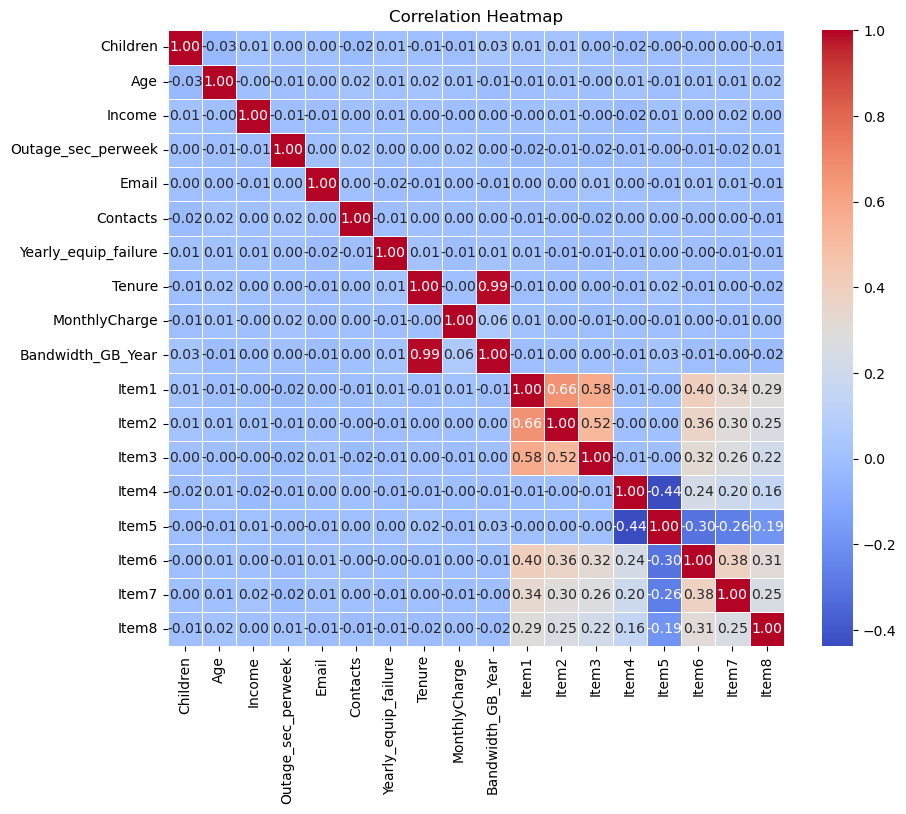

In [12]:
# Calculate the correlation matrix
corr = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))  # Adjust the size as needed
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', 
            cbar=True, square=True, linewidths=.5)

plt.title('Correlation Heatmap')
plt.show()